In [1]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt
import time

In [2]:
model_id = "CompVis/stable-diffusion-v1-4"

if torch.cuda.is_available():
  device="cuda"
elif torch.xpu.is_available():
  device="xpu"
else:
  device="cpu"

print("Using device:", device)

# Instantiate Stable Diffusion Pipeline with FP16 weights
pipe = DiffusionPipeline.from_pretrained(model_id, variant="fp16", torch_dtype=torch.float16)
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

safety_checker/model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
pipe = pipe.to(device)

  0%|          | 0/50 [00:00<?, ?it/s]

9.35811161994934
CPU times: user 7.23 s, sys: 324 ms, total: 7.55 s
Wall time: 9.36 s


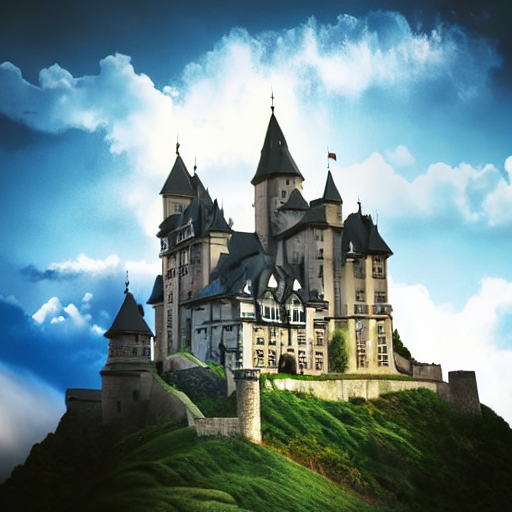

In [4]:
%%time
prompt = "a majestic castle in the clouds"
start_time = time.time()
image = pipe(prompt).images[0]
end_time = time.time()
# image.save("majestic_castle.png")
duration = end_time - start_time
print(duration)
image

  0%|          | 0/50 [00:00<?, ?it/s]

W0823 17:44:45.952000 1835 torch/_inductor/utils.py:1436] [0/0] Not enough SMs to use max_autotune_gemm mode


130.17193222045898
CPU times: user 1min 15s, sys: 6.37 s, total: 1min 22s
Wall time: 2min 14s


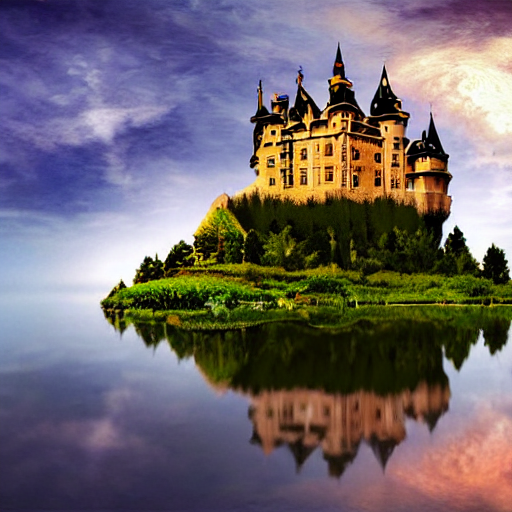

In [5]:
%%time
backend = "inductor"
pipe.unet.forward = torch.compile(pipe.unet.forward, backend=backend)

prompt = "a majestic castle in the clouds"
start_time = time.time()
image = pipe(prompt).images[0]
end_time = time.time()
duration = end_time - start_time
print(duration)

# image.save("majestic_castle.png")
image